

---

### Problem Statement:

**Predicting Car Sales Prices Using Machine Learning**

In today's competitive automotive market, pricing vehicles correctly is crucial for maximizing sales and profitability. However, determining the optimal price for each car can be challenging due to various factors such as market demand, vehicle specifications, and economic conditions. To address this challenge, we aim to develop a machine learning model that accurately predicts car sales prices based on relevant attributes.
![Car Sales Prediction](https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8)
### Column Names and Descriptions:

- **Manufacturer**: The brand or company that produced the car.
- **Model**: The specific model of the car.
- **Year**: The manufacturing year of the car.
- **Mileage**: The total distance the car has traveled in miles.
- **Fuel_Type**: The type of fuel used by the car (e.g., petrol, diesel).
- **Transmission**: The transmission type of the car (e.g., manual, automatic).
- **Engine_Size**: The engine size of the car in liters.
- **Horsepower**: The horsepower of the car.
- **Body_Type**: The body type of the car (e.g., sedan, SUV, hatchback).
- **Color**: The color of the car.
- **Condition**: The overall condition of the car (e.g., excellent, good, fair).
- **Price**: The selling price of the car (target variable).

By leveraging historical sales data and utilizing machine learning algorithms, we intend to build a predictive model that can accurately estimate the selling price of cars. This model will assist automotive dealerships and sellers in setting competitive and optimal prices for their inventory, ultimately leading to increased sales and profitability.


#### Importing Libraries

In [57]:
### Data Wrangling 

import numpy as np  # Importing numpy for numerical computations
import pandas as pd  # Importing pandas for data manipulation
import missingno  as mn # Importing missingno for visualizing missing data patterns
from collections import Counter  # Importing Counter for counting occurrences
from collections import OrderedDict  # Importing OrderedDict for ordered dictionaries

### Data Visualization

import matplotlib.pyplot as plt  # Importing matplotlib for basic plotting
import seaborn as sns  # Importing seaborn for statistical data visualization

### Data Preprocessing

import statsmodels.api as sm  # Importing statsmodels for statistical models and tests
from scipy import stats  # Importing stats from scipy for statistical functions

### Modelling 

from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data
from math import sqrt  # Importing sqrt for square root operation
from sklearn.metrics import mean_squared_error, r2_score  # Importing evaluation metrics
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for linear regression modeling
from sklearn.linear_model import Lasso  # Importing Lasso for Lasso regression
from sklearn.linear_model import Ridge  # Importing Ridge for Ridge regression
from sklearn.svm import SVR  # Importing SVR for Support Vector Regression
from sklearn.tree import DecisionTreeRegressor  # Importing DecisionTreeRegressor for decision tree modeling
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for random forest modeling
from sklearn.ensemble import StackingRegressor  # Importing StackingRegressor for stacking models
import xgboost as xg  # Importing xgboost for gradient boosting modeling

### Tabulating the results

from tabulate import tabulate  # Importing tabulate for tabulating results

### Remove unnecessary warnings

import warnings  # Importing warnings module
warnings.filterwarnings('ignore')  # Ignoring warnings


### Exploring The Data

In [58]:
# loading the data
dataset = pd.read_csv('Car_sales.csv')

In [59]:
#Top 5 rows
dataset.head().style.background_gradient(cmap='cool')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919000,16.360000,Passenger,21.500000,1.800000,140.000000,101.200000,67.300000,172.400000,2.639000,13.200000,28.000000,2/2/2012,58.280150
1,Acura,TL,39.384000,19.875000,Passenger,28.400000,3.200000,225.000000,108.100000,70.300000,192.900000,3.517000,17.200000,25.000000,6/3/2011,91.370778
2,Acura,CL,14.114000,18.225000,Passenger,nan,3.200000,225.000000,106.900000,70.600000,192.000000,3.470000,17.200000,26.000000,1/4/2012,nan
3,Acura,RL,8.588000,29.725000,Passenger,42.000000,3.500000,210.000000,114.600000,71.400000,196.600000,3.850000,18.000000,22.000000,3/10/2011,91.389779
4,Audi,A4,20.397000,22.255000,Passenger,23.990000,1.800000,150.000000,102.600000,68.200000,178.000000,2.998000,16.400000,27.000000,10/8/2011,62.777639


In [60]:
from tabulate import tabulate

def analyze_dataset(dataset):
    # Columns in Data
    columns_info = [["Column Name", "Data Type"]]
    for col in dataset.columns:
        columns_info.append([col, dataset[col].dtype])
    columns_table = tabulate(columns_info, headers="firstrow", tablefmt="grid")

    # Number of rows and columns
    num_rows, num_cols = dataset.shape
    shape_table = tabulate([["Number of rows:", num_rows], ["Number of columns:", num_cols]], tablefmt="grid")

    # Data Types
    data_types_table = tabulate(dataset.dtypes.to_frame().reset_index(), headers="keys", tablefmt="grid")

    # Column-wise Missing Data
    missing_data_table = tabulate(dataset.isnull().sum().to_frame().reset_index(), headers=["Column", "Missing Data"], tablefmt="grid")

    # Prepare output
    output = ""
    output += "Columns in Data:\n{}\n\n".format(columns_table)
    output += "Number of rows and columns:\n{}\n\n".format(shape_table)
    output += "Data Types:\n{}\n\n".format(data_types_table)
    output += "Column-wise Missing Data:\n{}\n\n".format(missing_data_table)

    return output

# Usage
print(analyze_dataset(dataset))


Columns in Data:
+---------------------+-------------+
| Column Name         | Data Type   |
+=====================+=============+
| Manufacturer        | object      |
+---------------------+-------------+
| Model               | object      |
+---------------------+-------------+
| Sales_in_thousands  | float64     |
+---------------------+-------------+
| __year_resale_value | float64     |
+---------------------+-------------+
| Vehicle_type        | object      |
+---------------------+-------------+
| Price_in_thousands  | float64     |
+---------------------+-------------+
| Engine_size         | float64     |
+---------------------+-------------+
| Horsepower          | float64     |
+---------------------+-------------+
| Wheelbase           | float64     |
+---------------------+-------------+
| Width               | float64     |
+---------------------+-------------+
| Length              | float64     |
+---------------------+-------------+
| Curb_weight         | float64  

In [61]:
# Columns in Data
for i in dataset.columns:
    print(i)

Manufacturer
Model
Sales_in_thousands
__year_resale_value
Vehicle_type
Price_in_thousands
Engine_size
Horsepower
Wheelbase
Width
Length
Curb_weight
Fuel_capacity
Fuel_efficiency
Latest_Launch
Power_perf_factor


In [62]:
# no of rows and columns
print("The Number of the are :" , dataset.shape[0])

print("The Number of the columns are:" , dataset.shape[1])
dataset.dtypes

The Number of the are : 157
The Number of the columns are: 16


Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [63]:
# info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [64]:
# dtypes
dataset.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [65]:
# setting proper data types
dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Vehicle_type = dataset.Vehicle_type.astype('category')

The column wise missing data is give below
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


<Axes: >

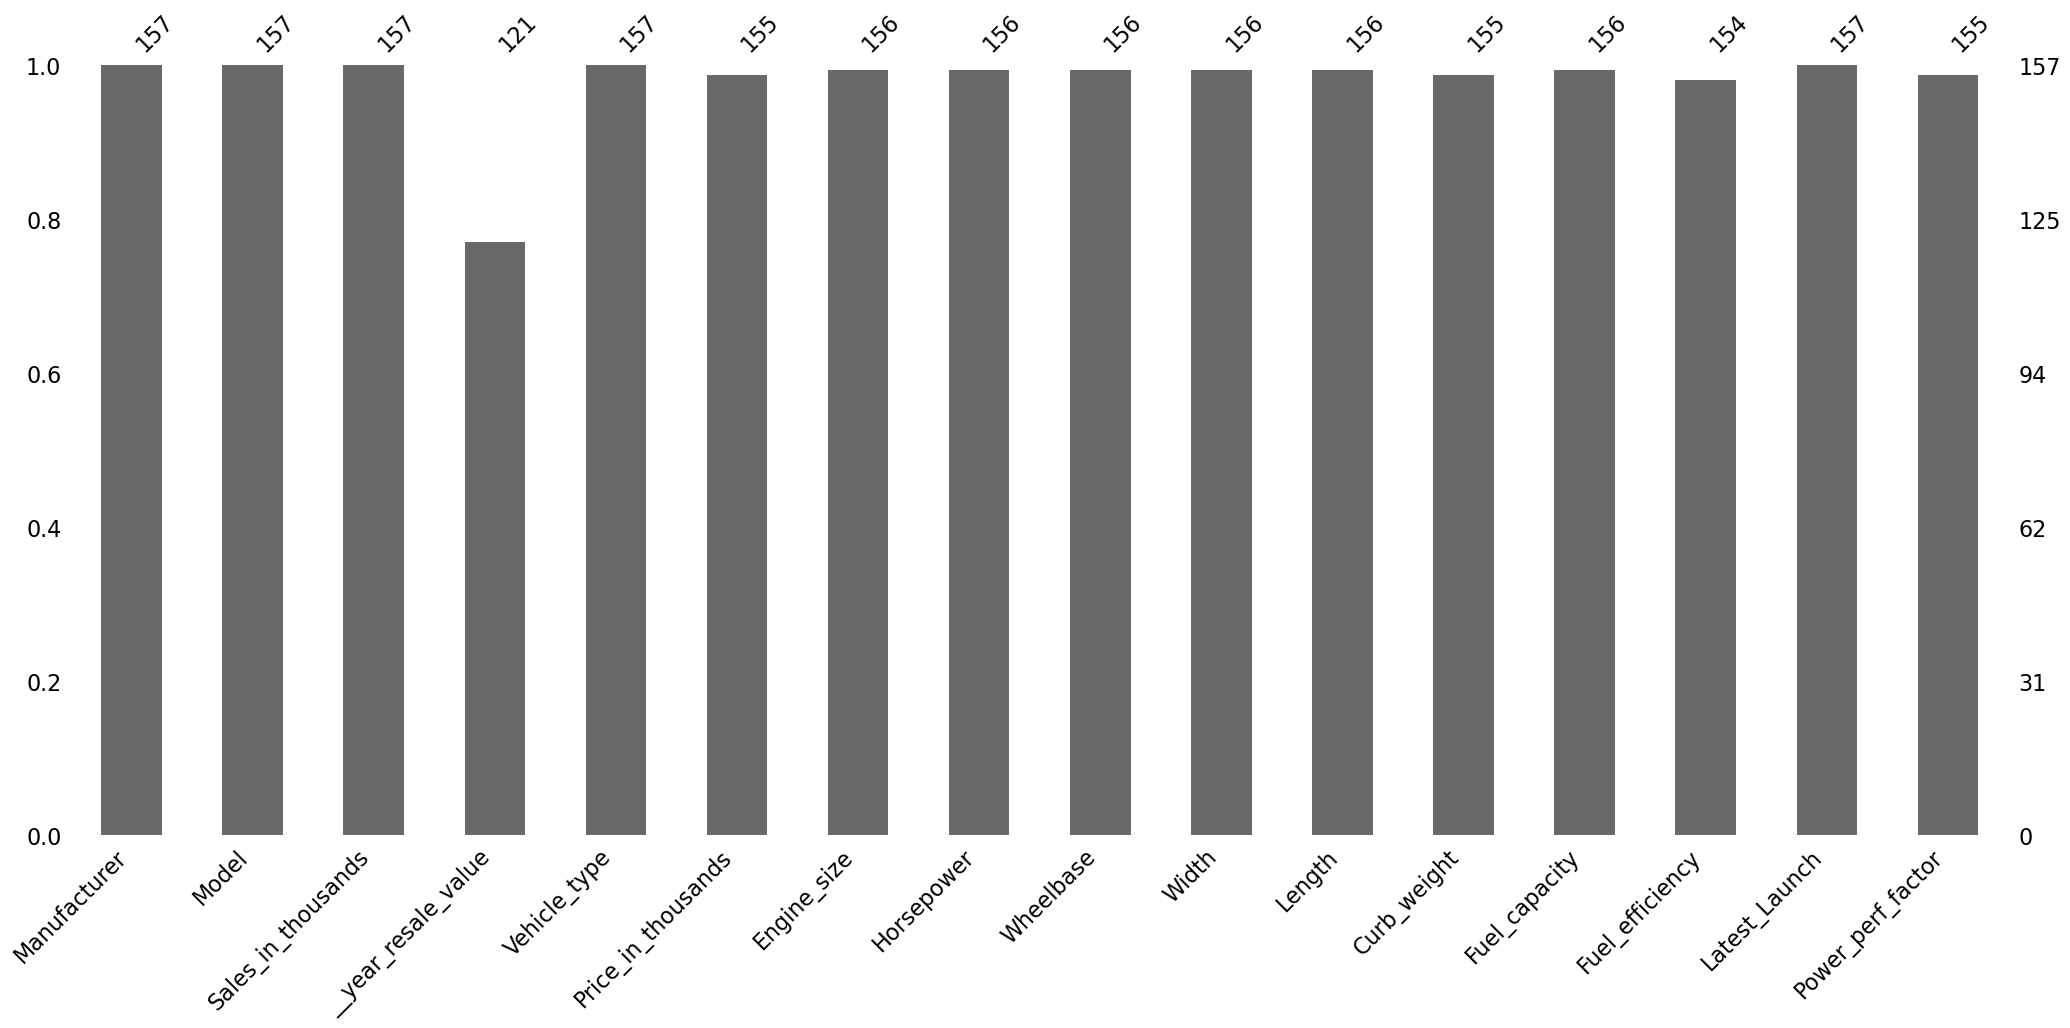

In [66]:
# missing values
print("The column wise missing data is give below")
print(dataset.isnull().sum())
mn.bar(dataset)

In [76]:
# adding a column
manufacturer_count=dataset['Manufacturer'].value_counts()
manufacturer_count

### adding columnMean price per each Manufacturer 

mean_price_manufacturer = dataset[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer

### Value counts of the column - Vehicle_type

vehicle_count = dataset['Vehicle_type'].value_counts(dropna = False)
vehicle_count

### Mean price per each Vehicle type

mean_price_vehicle = dataset[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

# Value counts of 'Manufacturer'
print("Manufacturer Count:")
print(manufacturer_count)

# Mean price per each Manufacturer
print("\nMean Price per Manufacturer:")
print(mean_price_manufacturer)

# Value counts of the column 'Vehicle_type'
print("\nVehicle Type Count:")
print(vehicle_count)

print("\nVehicle_type:")
print(mean_price_vehicle)


Manufacturer Count:
Manufacturer
Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Chrysler       7
Mitsubishi     7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

Mean Price per Manufacturer:
   Manufacturer  Price_in_thousands
0         Acura           30.633333
1          Audi           39.980000
2           BMW           33.096667
3         Buick           26.781250
4      Cadillac           40.254000
5     Chevrolet           20.022778
6      Chrysler           23.430833
7         Dodge           24.213636
8          Ford           21.047273
9         Honda           20.277000
10   

## Ploting Categorical Column

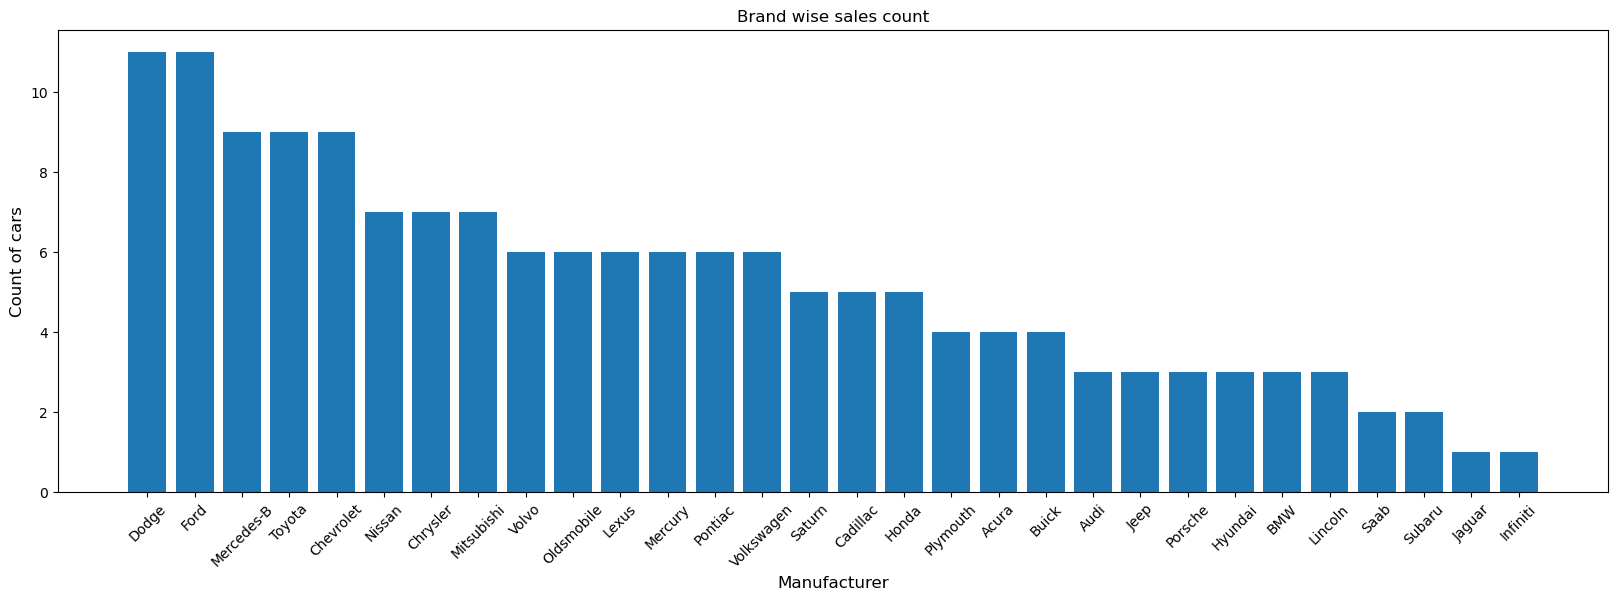

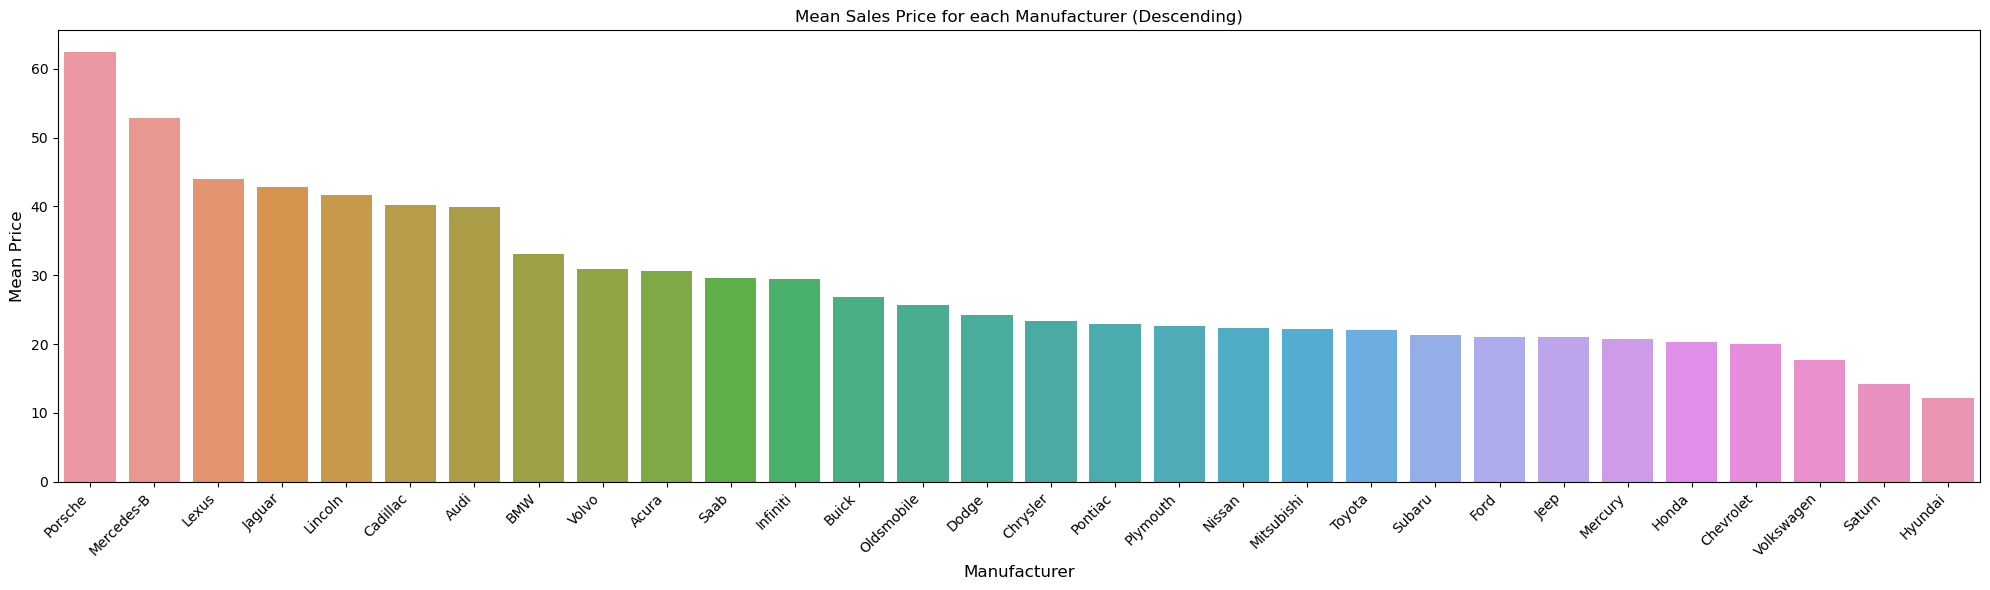

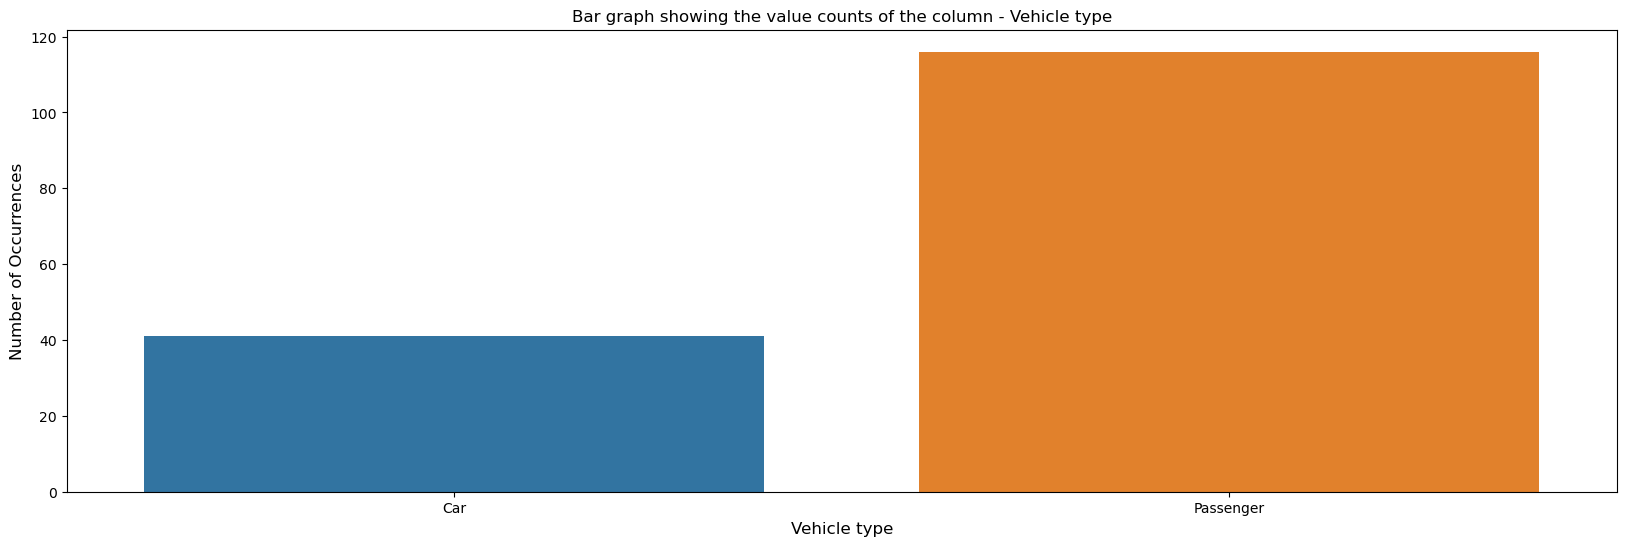

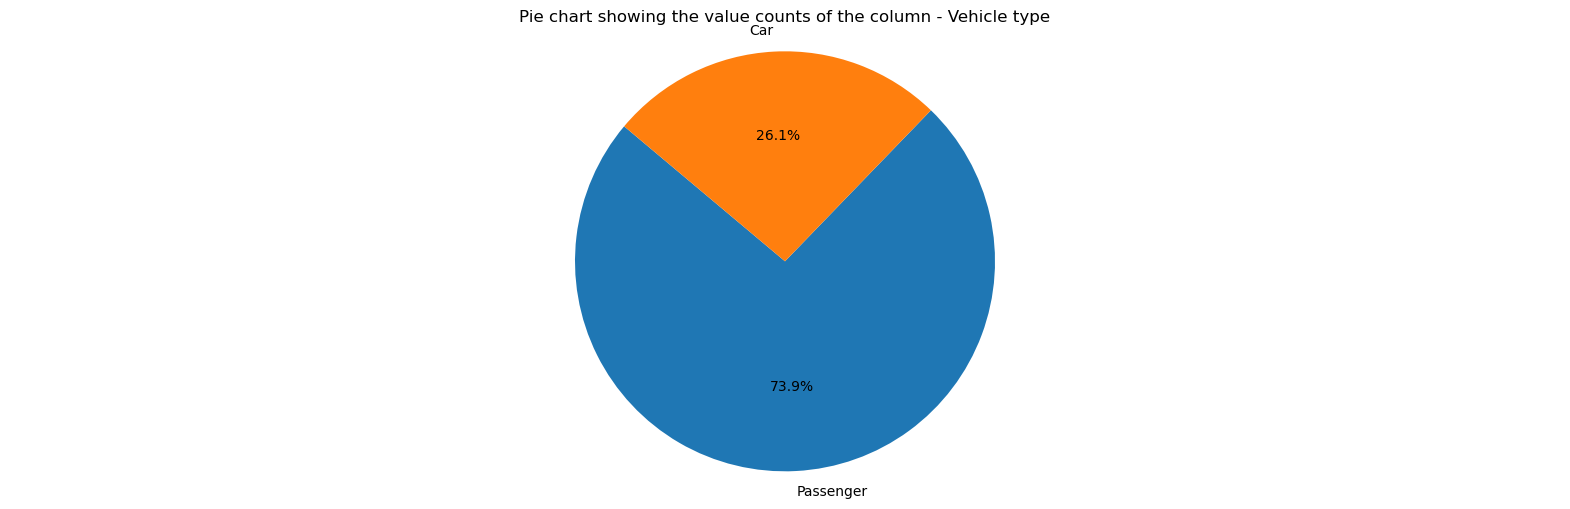

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Brand wise sales count
plt.figure(figsize=(20, 6))
plt.bar(manufacturer_count.index, manufacturer_count.values)
plt.title("Brand wise sales count")
plt.ylabel("Count of cars", fontsize=12)
plt.xlabel("Manufacturer", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Mean Sales Price for each Manufacturer (Descending)
plt.figure(figsize=(20, 6))
sns.barplot(data=mean_price_manufacturer_sorted, x='Manufacturer', y='Price_in_thousands', order=mean_price_manufacturer_sorted['Manufacturer'])
plt.title('Mean Sales Price for each Manufacturer (Descending)')
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('Manufacturer', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Bar graph showing the value counts of the column - Vehicle type
plt.figure(figsize=(20, 6))
sns.barplot(x=vehicle_count.index, y=vehicle_count.values)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle type', fontsize=12)
plt.show()

# Pie chart showing the value counts of the column - Vehicle type
plt.figure(figsize=(20, 6))
plt.pie(vehicle_count.values, labels=vehicle_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart showing the value counts of the column - Vehicle type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Ploting Numerical Columns

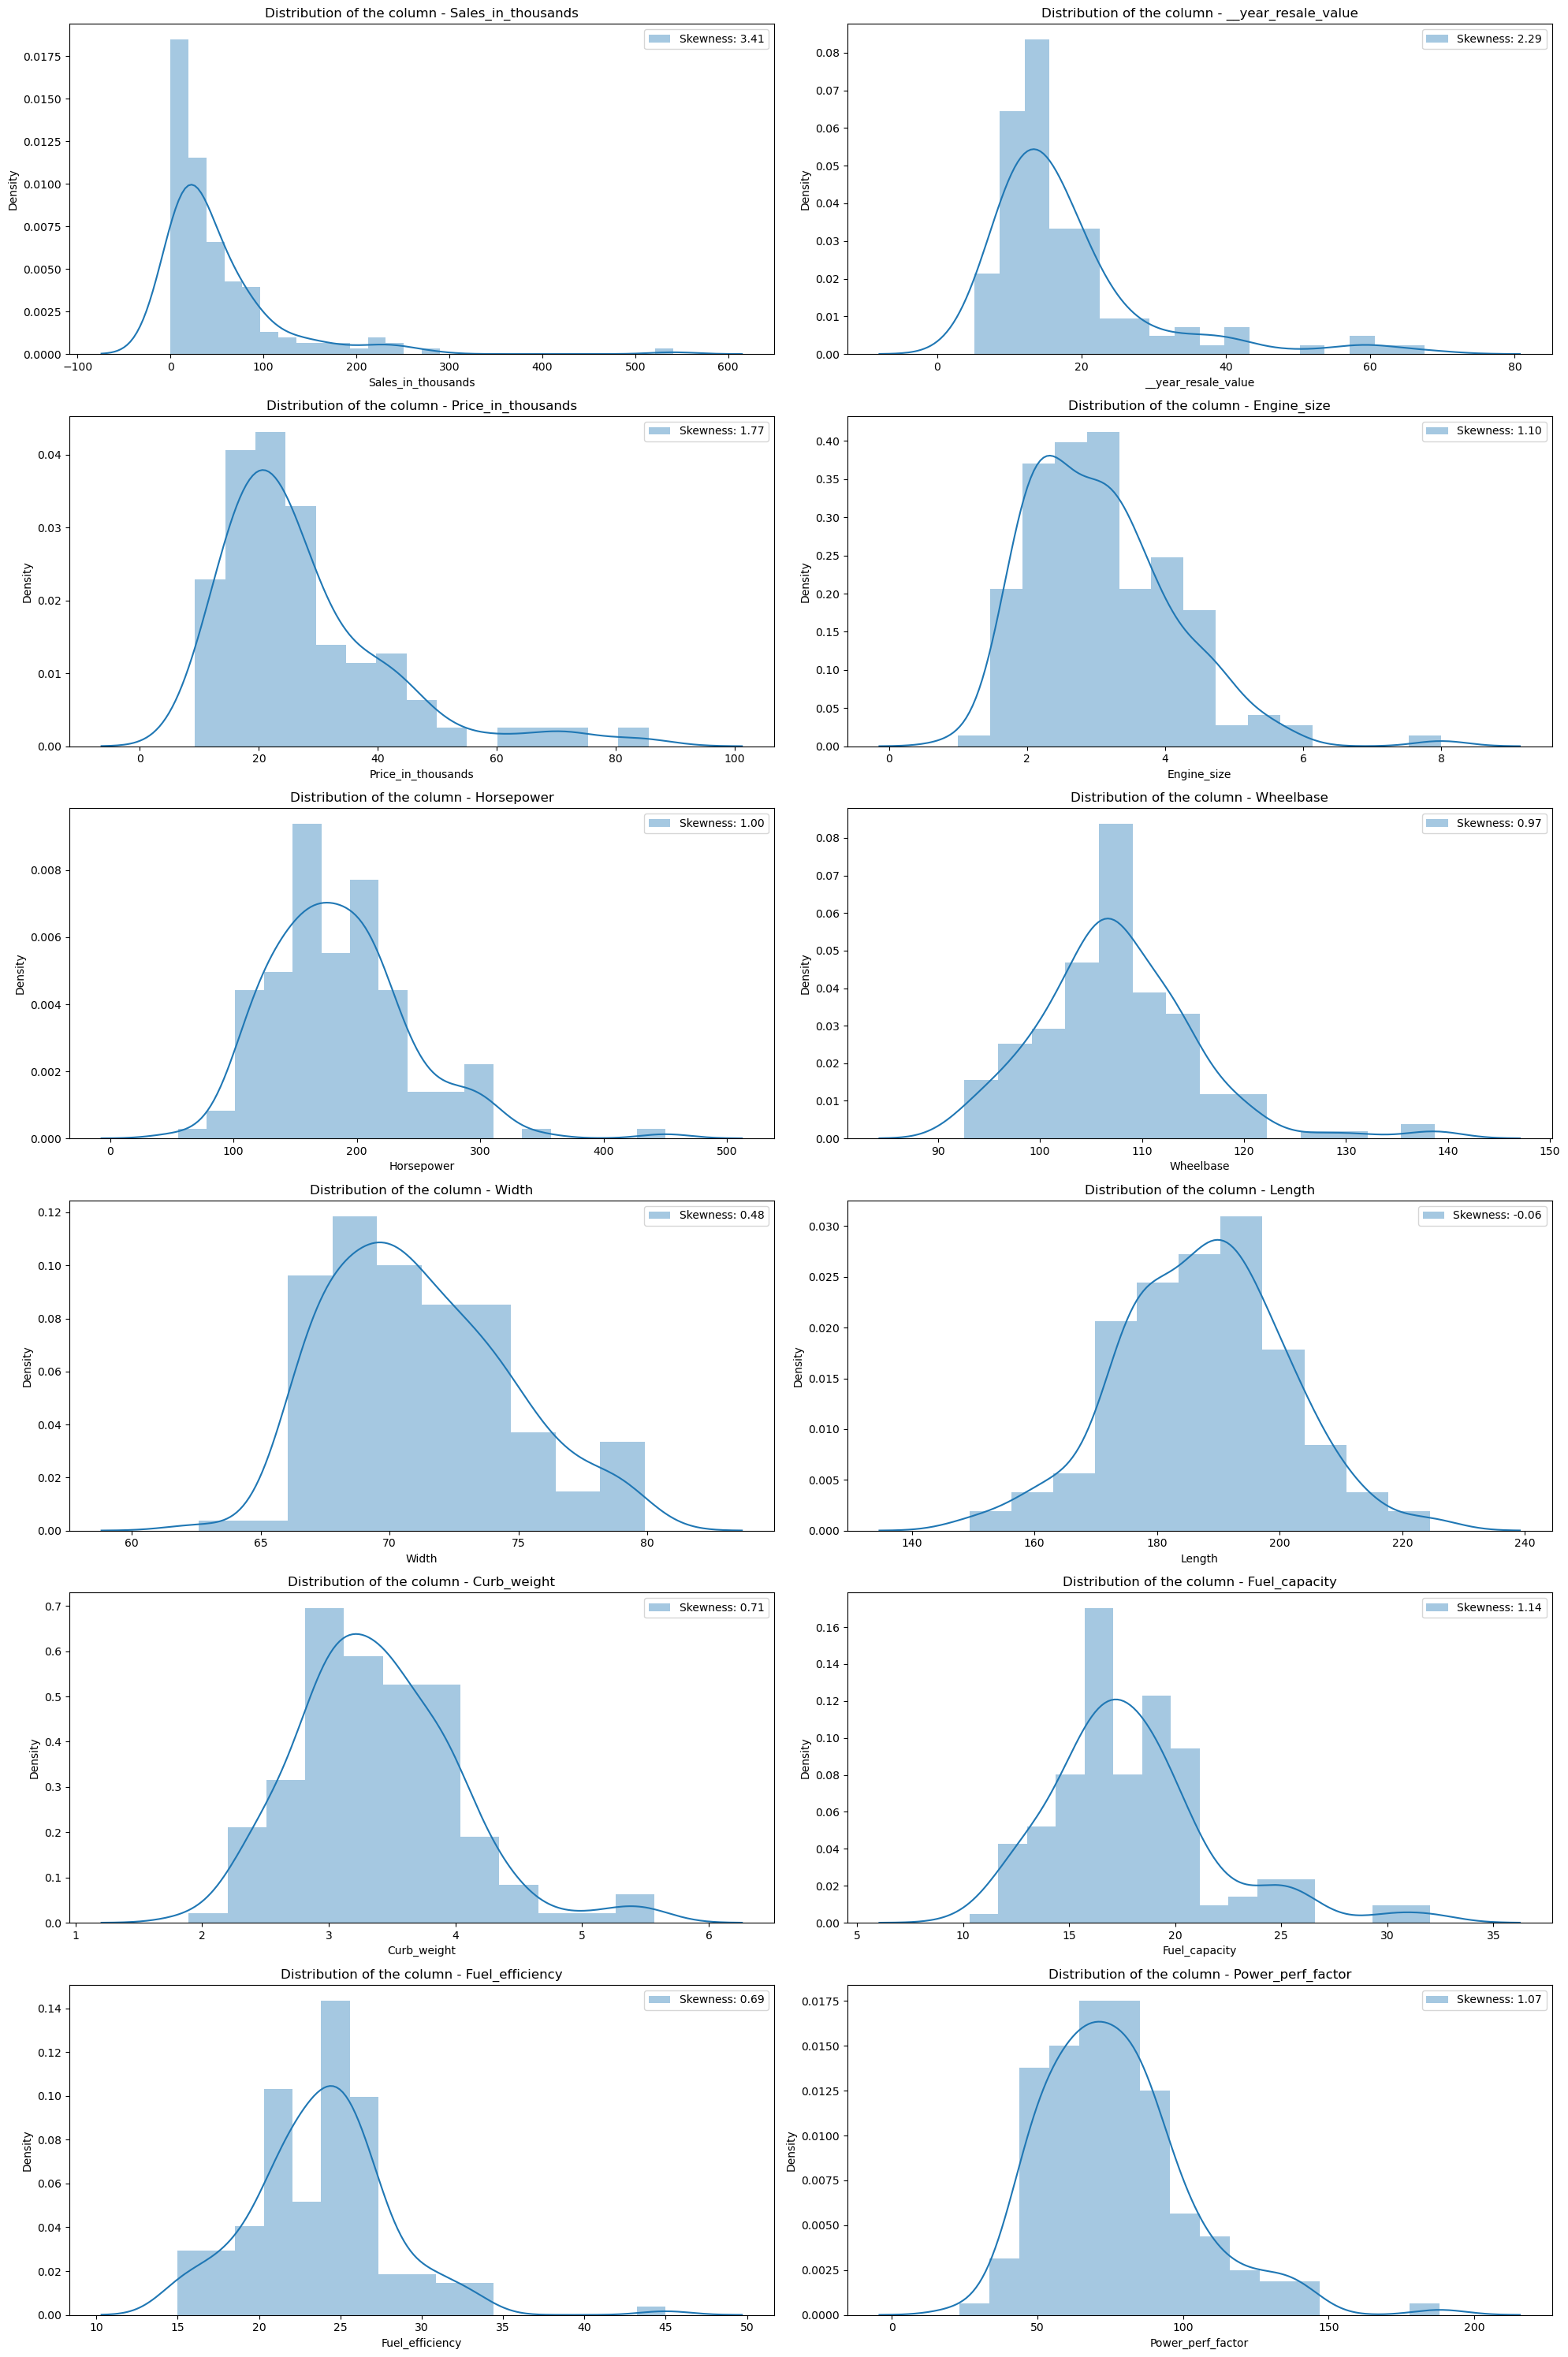

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(6, 2, figsize=(20, 30))

# Flatten the axes for easier indexing
axes = axes.flatten()

# List of columns to plot
columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 
           'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 
           'Fuel_efficiency', 'Power_perf_factor']

# Plot each column
for i, col in enumerate(columns):
    sns.distplot(dataset[col], label=f'Skewness: {dataset[col].skew():.2f}', ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(f'Distribution of the column - {col}')

# Adjust layout
plt.tight_layout()
plt.show()


## Data Preprocessing